## Flood Fill

An image is represented by an m x n integer grid image where image[i][j] represents the pixel value of the image.

You are also given three integers sr, sc, and color. You should perform a flood fill on the image starting from the pixel image[sr][sc].

To perform a flood fill, consider the starting pixel, plus any pixels connected 4-directionally to the starting pixel of the same color as the starting pixel, plus any pixels connected 4-directionally to those pixels (also with the same color), and so on. Replace the color of all of the aforementioned pixels with color.

Return the modified image after performing the flood fill.

 

### Example 1:

Input: image = [[1,1,1],[1,1,0],[1,0,1]], sr = 1, sc = 1, color = 2\
Output: [[2,2,2],[2,2,0],[2,0,1]]\
Explanation: From the center of the image with position (sr, sc) = (1, 1) (i.e., the red pixel), all pixels connected by a path of the same color as the starting pixel (i.e., the blue pixels) are colored with the new color.
Note the bottom corner is not colored 2, because it is not 4-directionally connected to the starting pixel.

### Example 2:

Input: image = [[0,0,0],[0,0,0]], sr = 0, sc = 0, color = 0\
Output: [[0,0,0],[0,0,0]]\
Explanation: The starting pixel is already colored 0, so no changes are made to the image.

 

Constraints:

- m == image.length
- n == image[i].length
- 1 <= m, n <= 50
- 0 <= image[i][j], color < 216
- 0 <= sr < m
- 0 <= sc < n



## BFS

In [193]:
from queue import Queue

In [194]:
image = [[1,1,1],[1,1,0],[1,0,1]]
sr = 1
sc = 1
color = 2

In [195]:
def fill_bfs(image, sr, sc, color):
    
    img = image.copy()
    
    start_color = img[sr][sc]
    
    if start_color == color:
        return img
    
    n = len(img)
    m = len(img[0])
    
    q = Queue()
    q.put((sr,sc))
    img[sr][sc] = color
    
    while not q.empty():
        
        i, j = q.get()
        
        ngbrs = [[i-1,j], [i, j-1], [i+1, j], [i, j+1]]
    
        for (row, column) in ngbrs:
            if 0 <= row < n and 0 <= column < m  and img[row][column] != color and img[row][column] == start_color:
                img[row][column] = color
                q.put((row, column))
                
    return img

In [196]:
fill_bfs(image, sr, sc, color)

[[2, 2, 2], [2, 2, 0], [2, 0, 1]]

## DFS

In [197]:
image = [[1,1,1],[1,1,0],[1,0,1]]
sr = 1
sc = 1
color = 2

In [198]:
def _dfs(img, i, j, n, m, start_color, color):
    
    img[i][j] = color
    
    ngbrs = [[i-1,j], [i, j-1], [i+1, j], [i, j+1]]
    
    for (row, column) in ngbrs:
        if 0 <= row < n and 0 <= column < m  and img[row][column] != color and img[row][column] == start_color:
            _dfs(img, row, column, n, m, start_color, color)

In [199]:
def fill_dfs(image, sr, sc, color):
    
    img = image.copy()
    start_color = img[sr][sc]
    
    if start_color == color:
        return image
    
    n = len(img)
    m = len(img[0])
    
    _dfs(img, sr, sc, n, m, start_color, color)
    
    return img
    
    

In [200]:
fill_dfs(image, sr, sc, color)

[[2, 2, 2], [2, 2, 0], [2, 0, 1]]

## Matplotlib

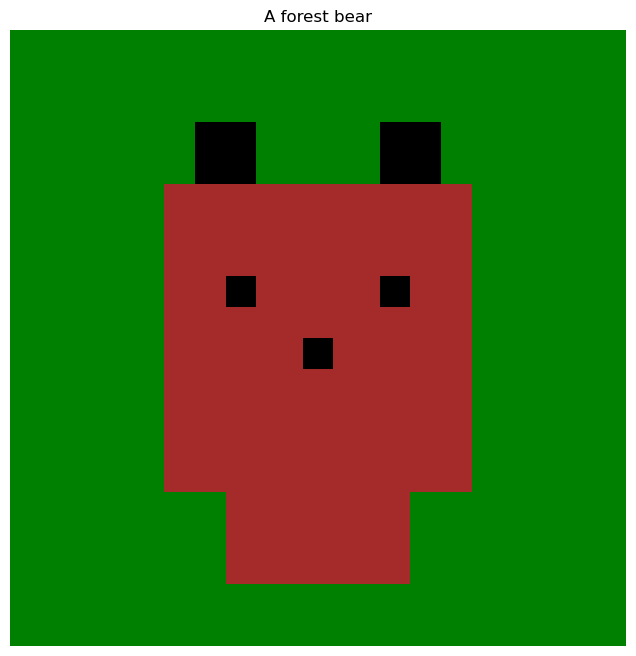

In [201]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

data = np.zeros((200, 200))

data[50:150, 50:150] = 1  # head
data[30:50, 60:80] = 2    # left ear
data[30:50, 120:140] = 2  # right ear
data[80:90, 70:80] = 2  # left eye
data[80:90, 120:130] = 2  # right eye
data[100:110, 95:105] = 2
data[150:180, 70:130] = 1


cmap = ListedColormap(['green', 'brown', 'black'])

plt.figure(figsize=(8, 8))
plt.imshow(data, cmap=cmap, interpolation='nearest')
plt.title('A forest bear')
plt.axis('off')

plt.show()

## Let's change to a polar bear

In [202]:
new_data = fill_bfs(data, 0, 0, 4)
new_data = fill_bfs(new_data, 50, 50, 3)

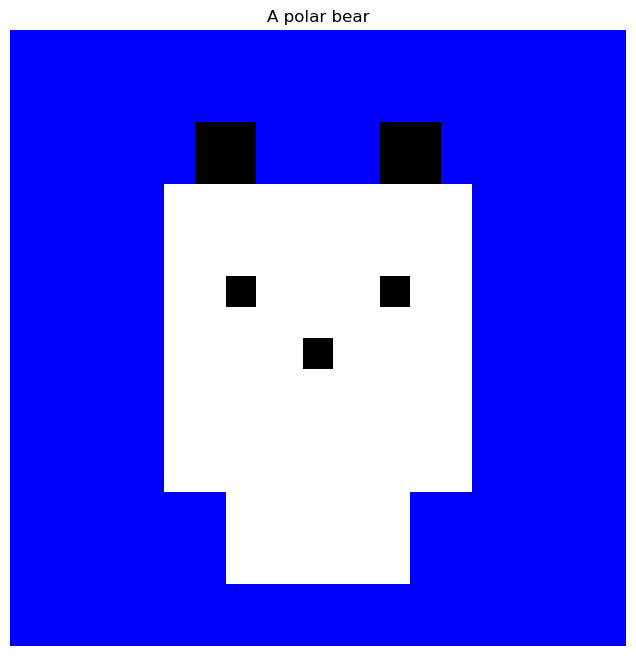

In [203]:
cmap = ListedColormap(['black', 'green', 'white', 'brown', 'blue'])

plt.figure(figsize=(8, 8))
plt.imshow(new_data, cmap=cmap, interpolation='nearest')
plt.title('A polar bear')
plt.axis('off')

plt.show()

I find the indexing of colormaps confusing. I think there should be a direct mapping of integers to colors. However, if you look at the new data, you can see that 0s have become 4s and 1s have become 3s, as expected.

In [205]:
data[50]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [204]:
new_data[50]

array([4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.])

## DPS maximum recursion depth exceeded

In [214]:
try:
    new_data = fill_dfs(data, 0, 0, 4)
    new_data = fill_dfs(new_data, 50, 50, 3)
except RecursionError:
    print("Opss!")

Opss!


WARNING: this also increases the risk of a stack overflow.\
To solve this issue:

In [217]:
import sys 

In [208]:
# Check current recursion limit
print("Current recursion limit:", sys.getrecursionlimit())

Current recursion limit: 3000


In [215]:
# Set a new recursion limit
sys.setrecursionlimit(200*200) #image is 200x200
print("New recursion limit set to:", sys.getrecursionlimit())

New recursion limit set to: 40000


In [216]:
new_data = fill_dfs(data, 0, 0, 4)
new_data = fill_dfs(new_data, 50, 50, 3)